<a href="https://colab.research.google.com/github/mcmoucheron/Portfolio-for-Remote-Data-Roles-Projects/blob/main/ESG_Analysis_Global_Chile_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup básico - Corre siempre primero
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("✅ Entorno listo para ESG analysis")

✅ Entorno listo para ESG analysis


In [2]:
!ls /content/*.csv

/content/data.csv


In [4]:
# Cargar dataset ESG
import pandas as pd

df = pd.read_csv('/content/data.csv')
print(f"✅ Dataset cargado!")
print(f"📊 Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas")


✅ Dataset cargado!
📊 Dimensiones: 722 filas, 21 columnas


In [5]:
# Info rápida de datos numéricos (scores ESG)
print("📈 Tipos de datos:")
print(df.dtypes)
print("\n📊 Resumen estadístico:")
df.describe()


📈 Tipos de datos:
ticker                  object
name                    object
currency                object
exchange                object
industry                object
logo                    object
weburl                  object
environment_grade       object
environment_level       object
social_grade            object
social_level            object
governance_grade        object
governance_level        object
environment_score        int64
social_score             int64
governance_score         int64
total_score              int64
last_processing_date    object
total_grade             object
total_level             object
cik                      int64
dtype: object

📊 Resumen estadístico:


,environment_score,social_score,governance_score,total_score,cik
count,722.000000,722.000000,722.000000,722.000000,7.220000e+02
mean,404.806094,292.182825,278.761773,975.750693,9.897925e+05
std,145.103870,57.017406,47.031536,218.751796,5.816815e+05
min,200.000000,160.000000,75.000000,600.000000,1.800000e+03
25%,240.000000,243.000000,235.000000,763.000000,7.231572e+05
50%,483.000000,302.000000,300.000000,1046.000000,1.046189e+06
75%,518.750000,322.750000,310.000000,1144.000000,1.470094e+06
max,719.000000,667.000000,475.000000,1536.000000,1.914023e+06


In [6]:
# Top 10 empresas por environment_score
top_environmental = df.nlargest(10, 'environment_score')[['name', 'environment_score', 'industry', 'total_score']]
print("🏆 TOP 10 empresas ambientales:")
top_environmental


🏆 TOP 10 empresas ambientales:


,name,environment_score,industry,total_score
195,PepsiCo Inc,719,Beverages,1417
176,Microsoft Corp,715,Technology,1533
250,Air Products and Chemicals Inc,700,Chemicals,1442
302,Edison International,700,Utilities,1528
309,Consolidated Edison Inc,700,Utilities,1358
334,Marathon Petroleum Corp,700,Energy,1381
372,Pioneer Natural Resources Co,700,Energy,1412
389,Sempra Energy,700,Utilities,1396
404,Trane Technologies PLC,700,Building,1409
435,Weyerhaeuser Co,700,Real Estate,1340


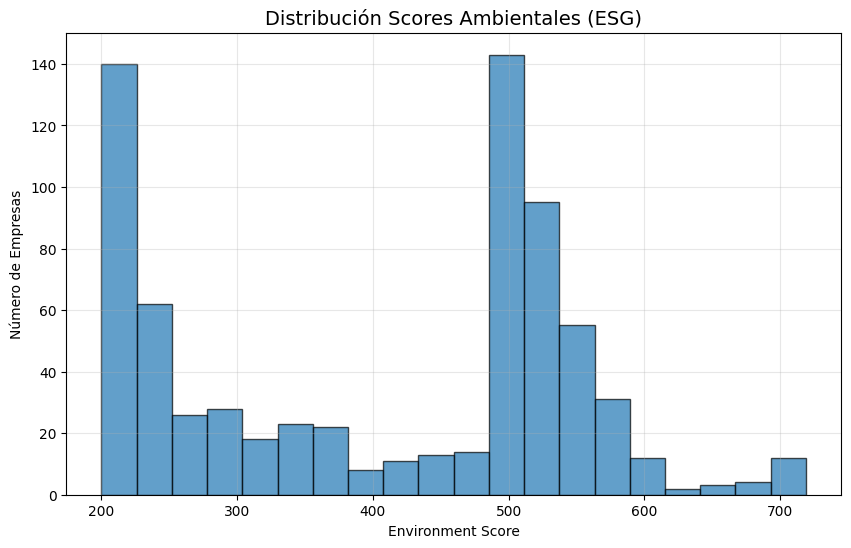

📊 Promedio environment_score: 404.8
📊 Mediana: 483.0


In [7]:
# Histograma environment_score
plt.figure(figsize=(10,6))
plt.hist(df['environment_score'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribución Scores Ambientales (ESG)', fontsize=14)
plt.xlabel('Environment Score')
plt.ylabel('Número de Empresas')
plt.grid(True, alpha=0.3)
plt.show()
print(f"📊 Promedio environment_score: {df['environment_score'].mean():.1f}")
print(f"📊 Mediana: {df['environment_score'].median():.1f}")


In [8]:
# Promedio environment_score por industria (top 10 industrias)
industry_env = df.groupby('industry')['environment_score'].agg(['mean', 'count']).round(2)
industry_env = industry_env[industry_env['count'] >= 5].sort_values('mean', ascending=False).head(10)
print("🌍 Environment Score por Industria (Top 10):")
industry_env


🌍 Environment Score por Industria (Top 10):


,mean,count
industry,,
Utilities,550.97,30
Energy,526.26,19
Food Products,516.57,14
Construction,495.33,6
Aerospace and Defense,485.00,10
Building,476.70,10
Chemicals,463.74,19
Machinery,459.57,21
Road and Rail,452.83,6


In [9]:
# Buscar empresas con "Chile", "Latam", "South America" o conocidas
chile_related = df[df['name'].str.contains('Chile|LATAM|SQM|Enel|CAP|CMPC', case=False, na=False)]
print("🇨🇱 Empresas relacionadas con Chile:")
chile_related[['name', 'environment_score', 'industry', 'total_score']]

# Si no hay, muestra por exchange/país aproximado
print("\n🔍 Empresas por exchange (busca códigos latinos):")
df['exchange'].value_counts().head(10)


🇨🇱 Empresas relacionadas con Chile:

🔍 Empresas por exchange (busca códigos latinos):


,count
exchange,
"NEW YORK STOCK EXCHANGE, INC.",377
NASDAQ NMS - GLOBAL MARKET,345
